## Pixel level transformation with Pillow 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#### Load an image

We can use the Pillow library to load an image and convert it in the different color spaces

In [2]:
impath = 'images/segment-12321865437129862911_3480_000_3500_000_with_camera_labels_2.png'

In [4]:
img = Image.open(impath)

In [8]:
type(img)

PIL.PngImagePlugin.PngImageFile

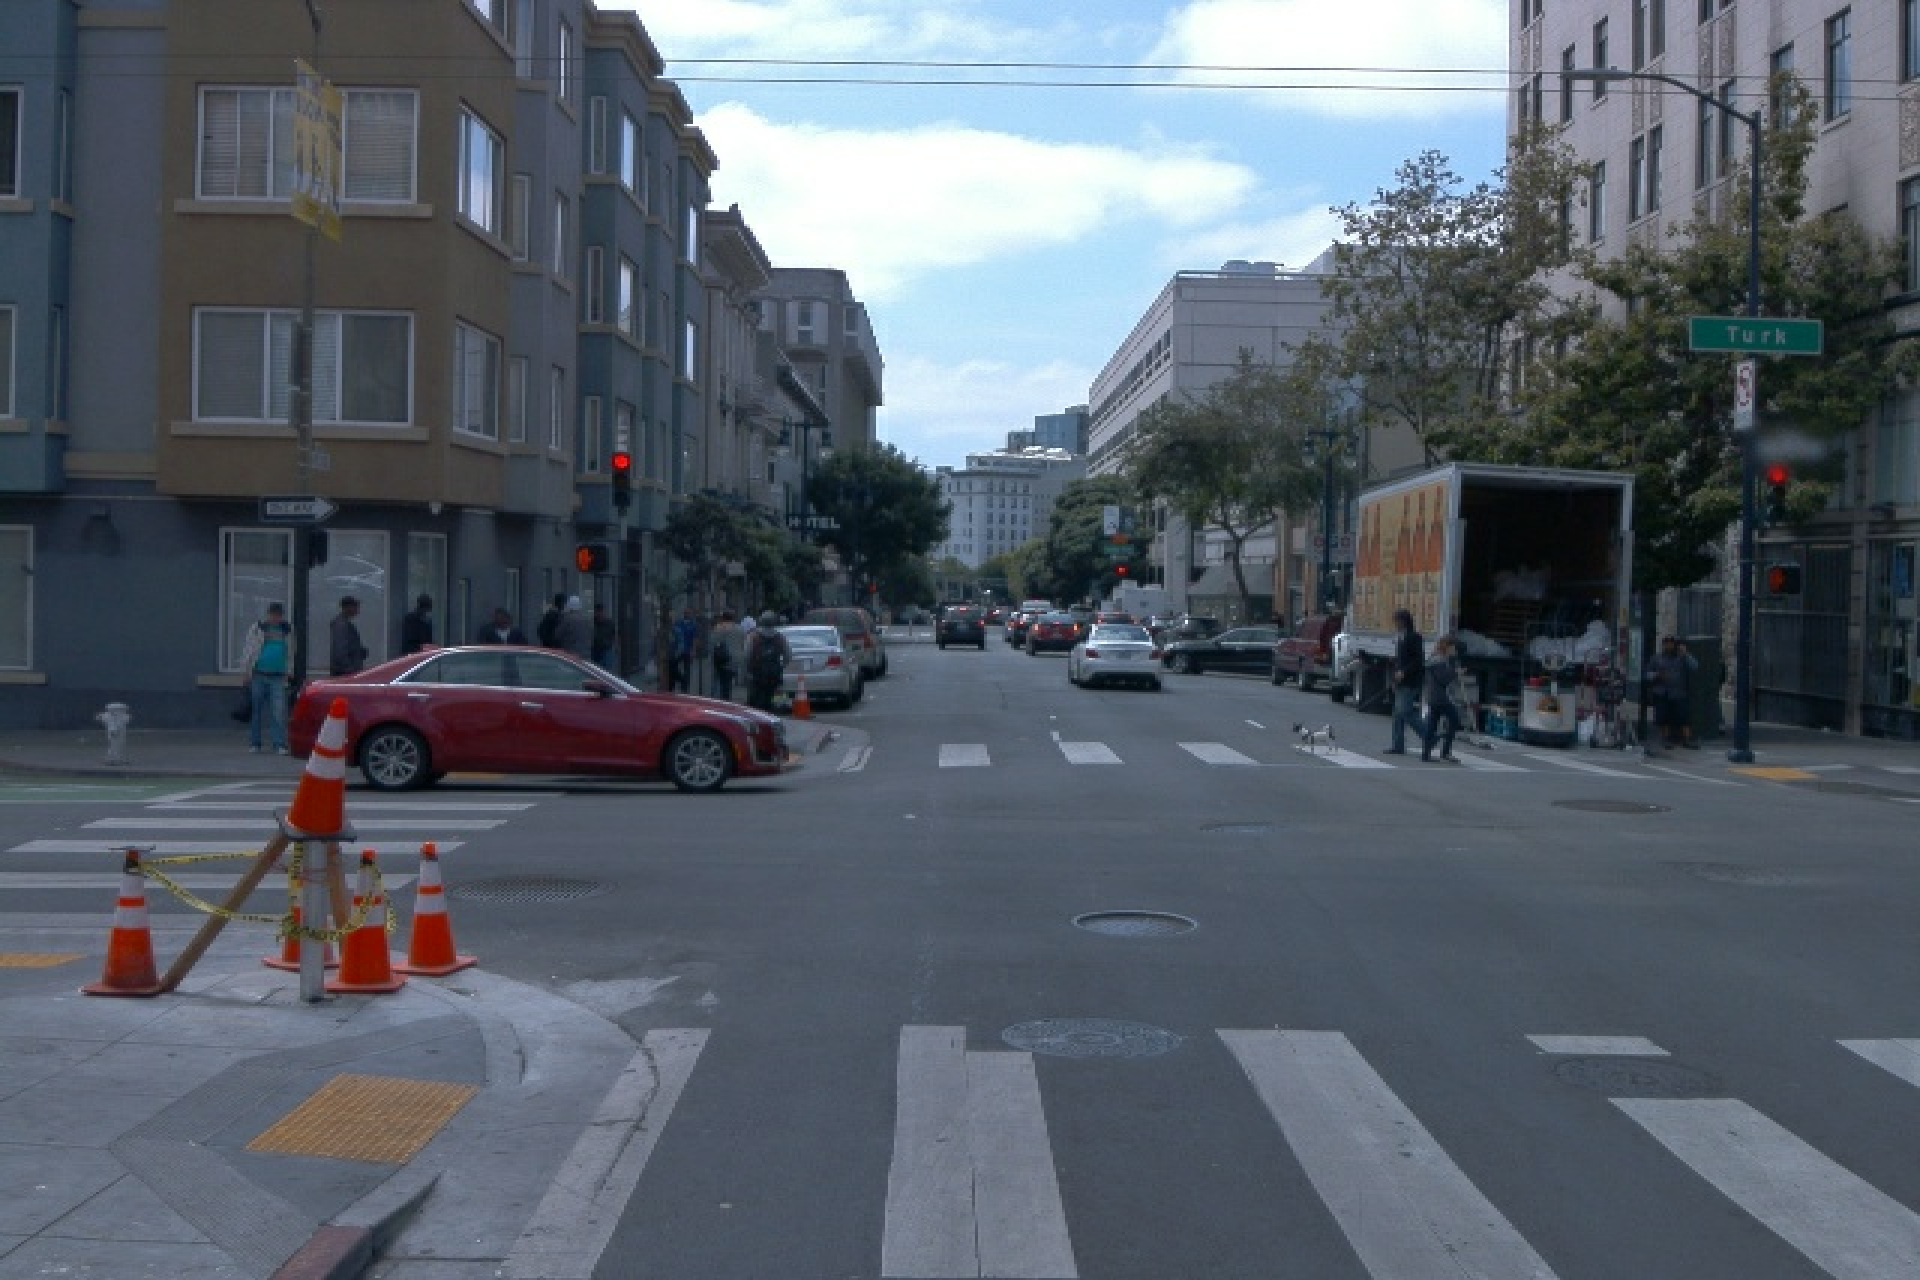

In [6]:
img

A Pillow image has several attribute, such as size, name or mode

In [9]:
img.mode

'RGB'

In [10]:
img.size

(1920, 1280)

In [12]:
img.filename

'images/segment-12321865437129862911_3480_000_3500_000_with_camera_labels_2.png'

In [13]:
print(f'Our image is a {img.mode} image, of dimensions {img.size} and located at {img.filename}')

Our image is a RGB image, of dimensions (1920, 1280) and located at images/segment-12321865437129862911_3480_000_3500_000_with_camera_labels_2.png


In [14]:
img_rgb = img.convert('RGB')

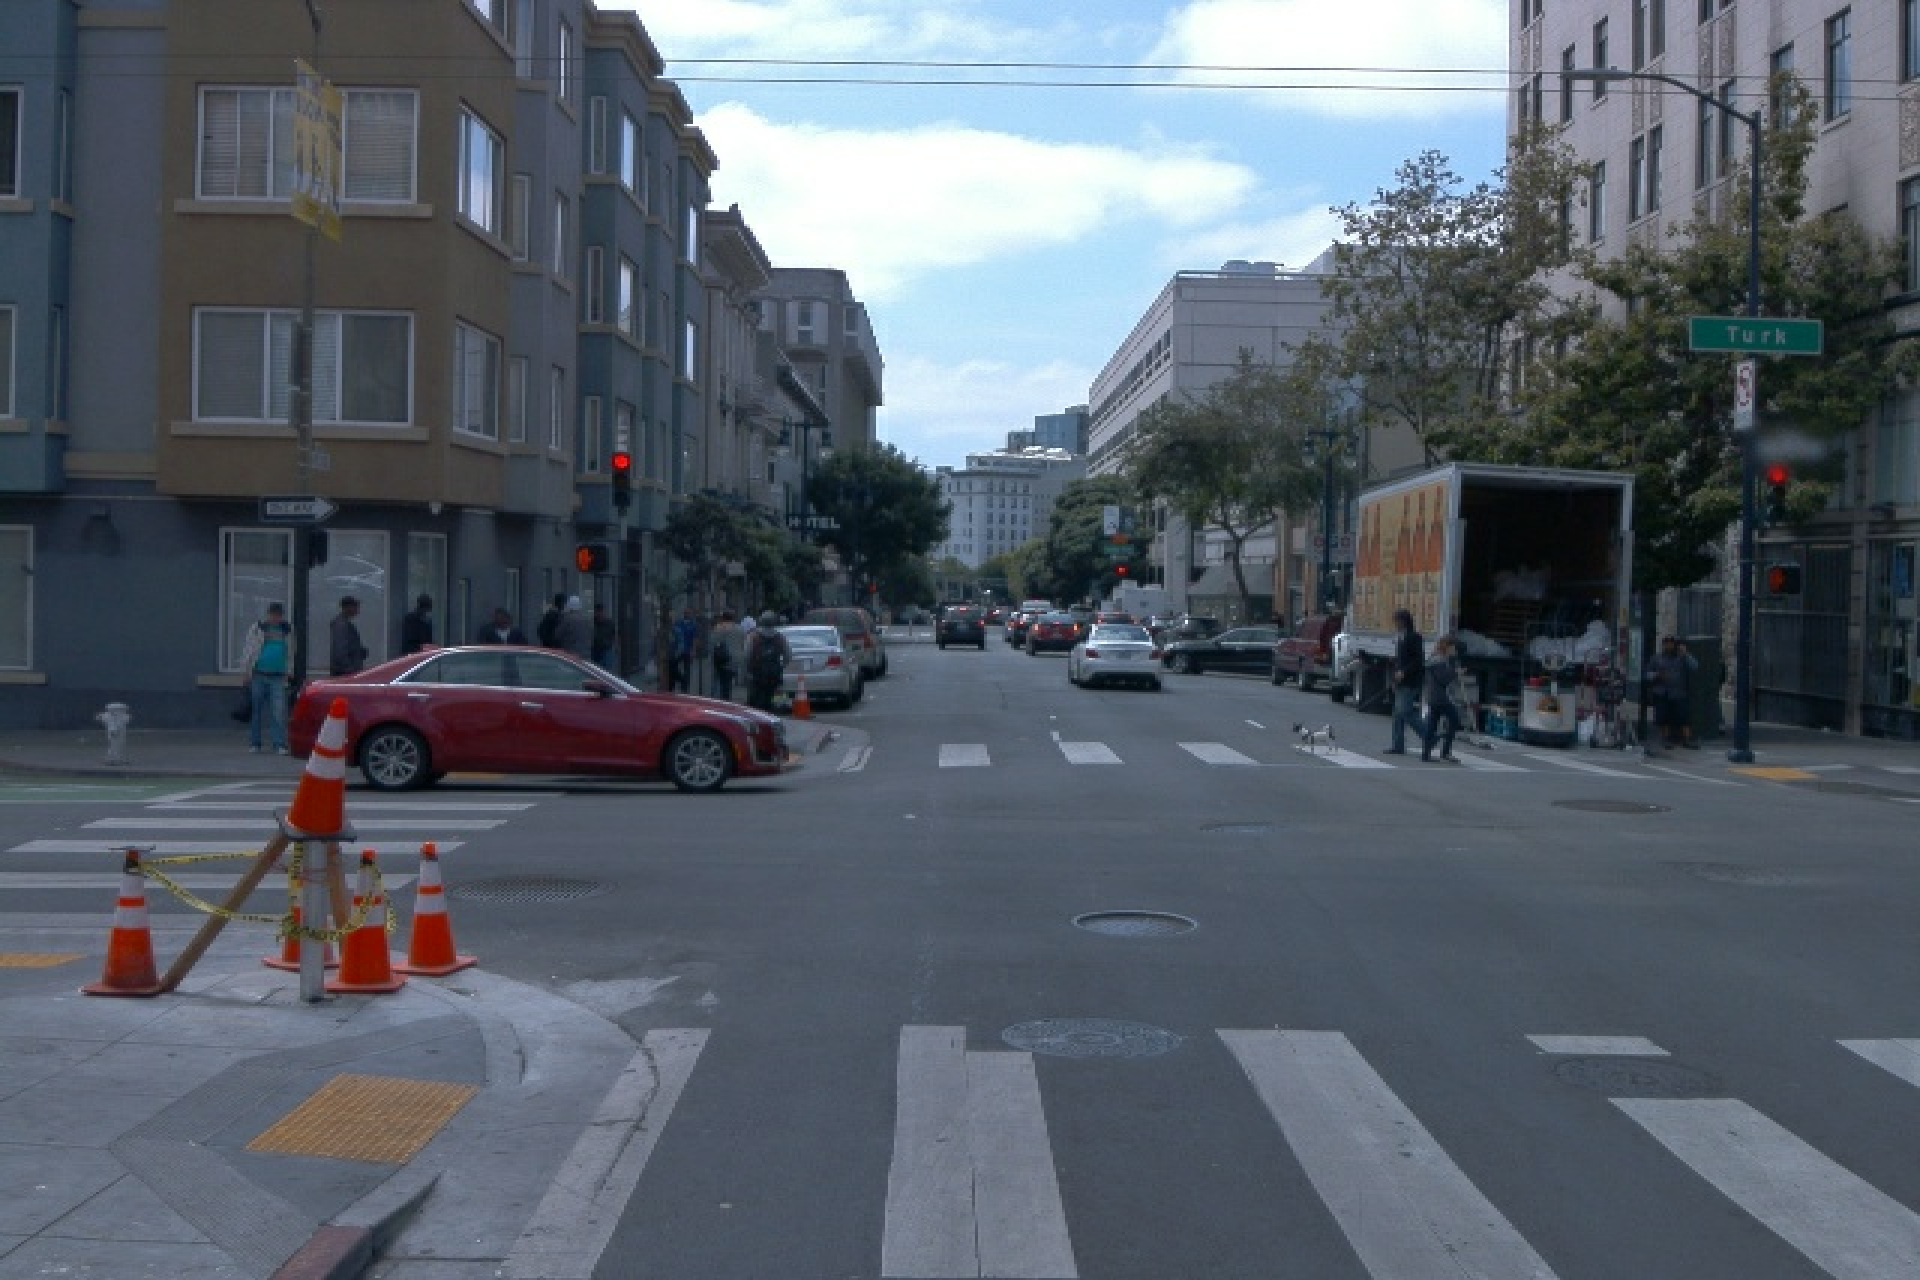

In [15]:
img_rgb

#### Convert an image

Once the image is loaded, we can convert it between different color spaces.

In [16]:
# convert to grayscale
img_gray = img.convert('L')

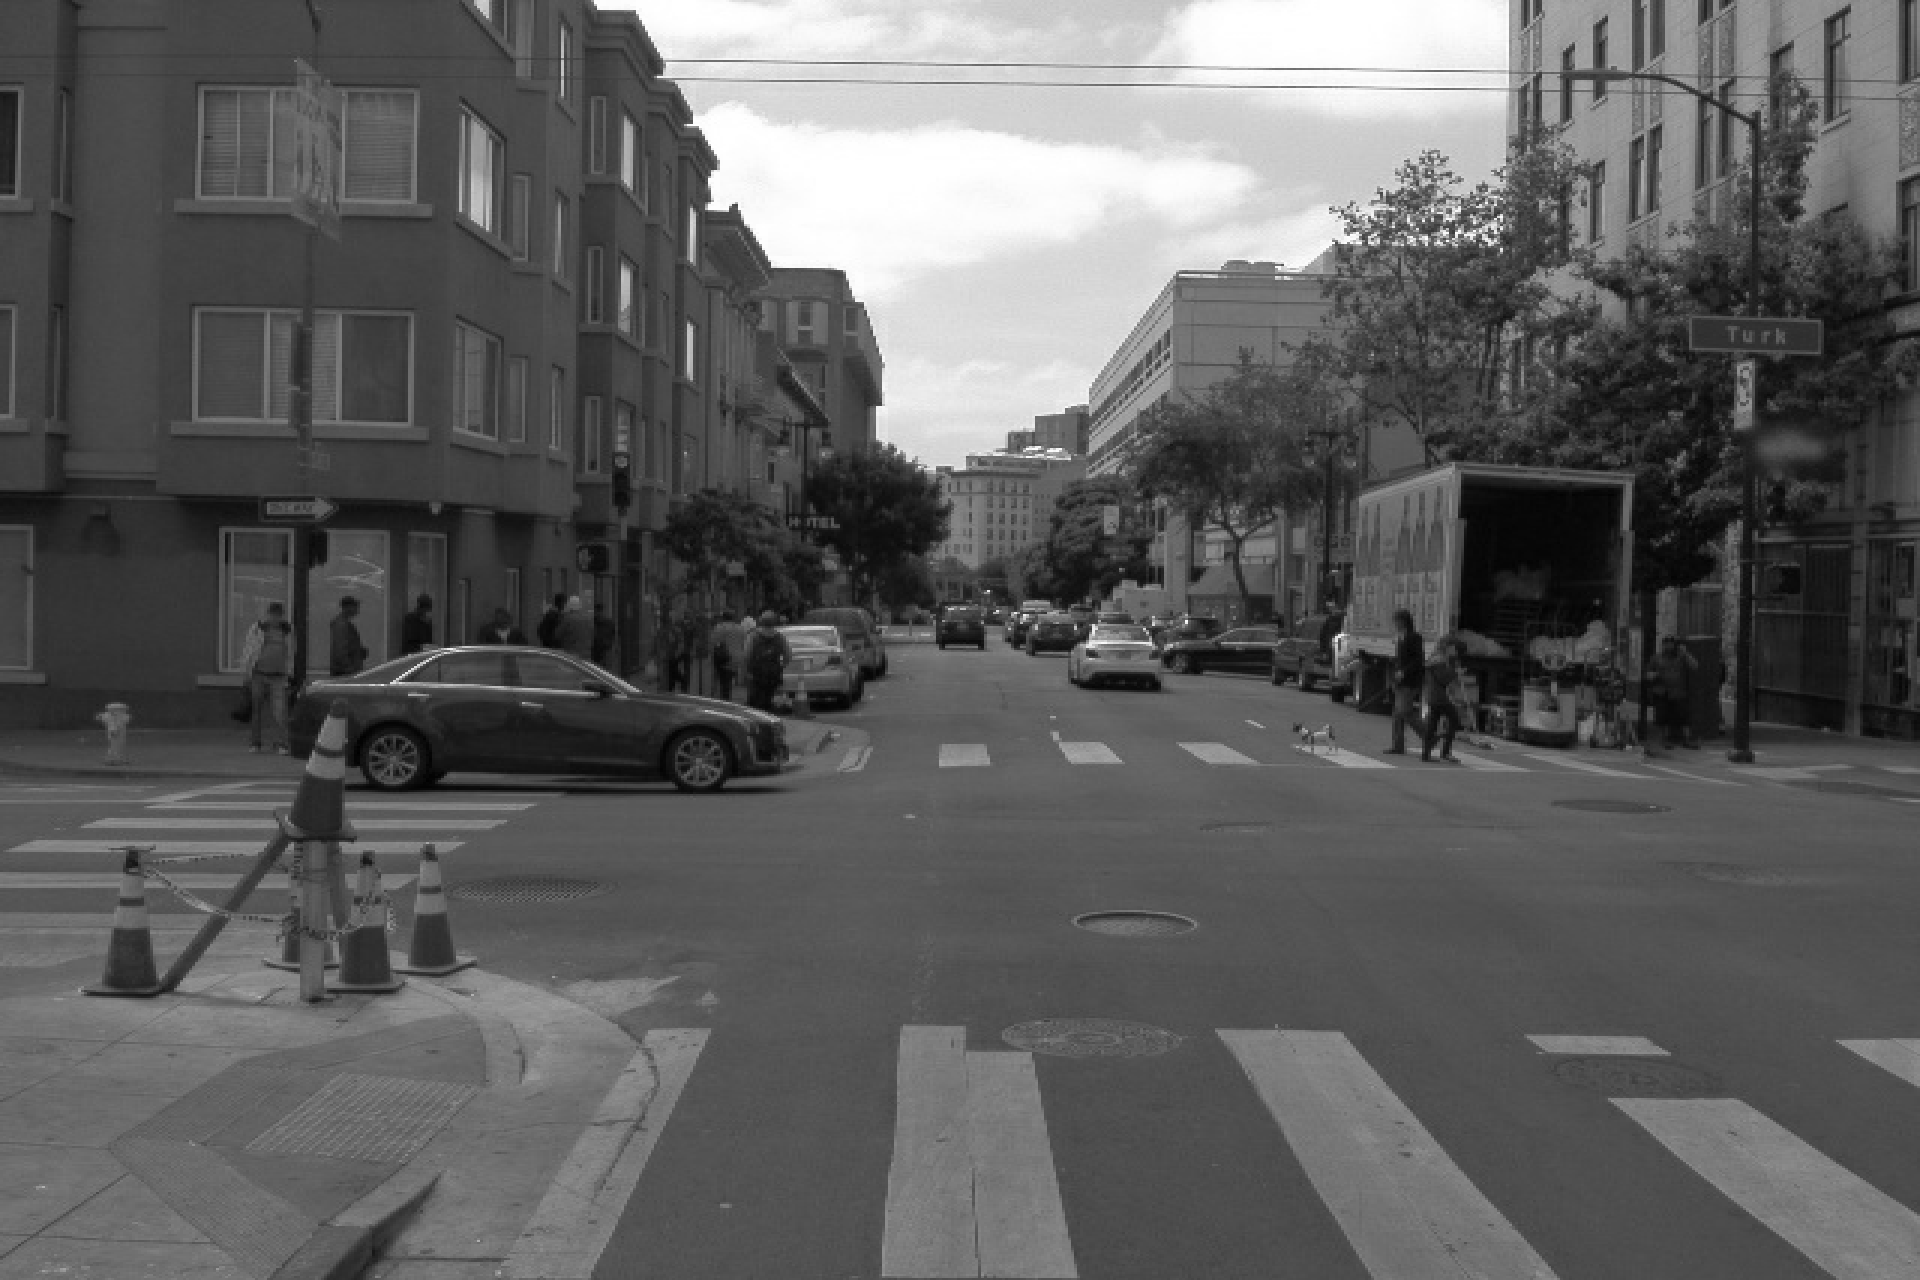

In [18]:
img_gray

In [19]:
img_gray.mode

'L'

In [20]:
# convert to hsv. PNG does not support HSV color model and we cannot display it.
img_hsv = img.convert('HSV')

In [21]:
img_hsv.mode

'HSV'

#### Color thresholding

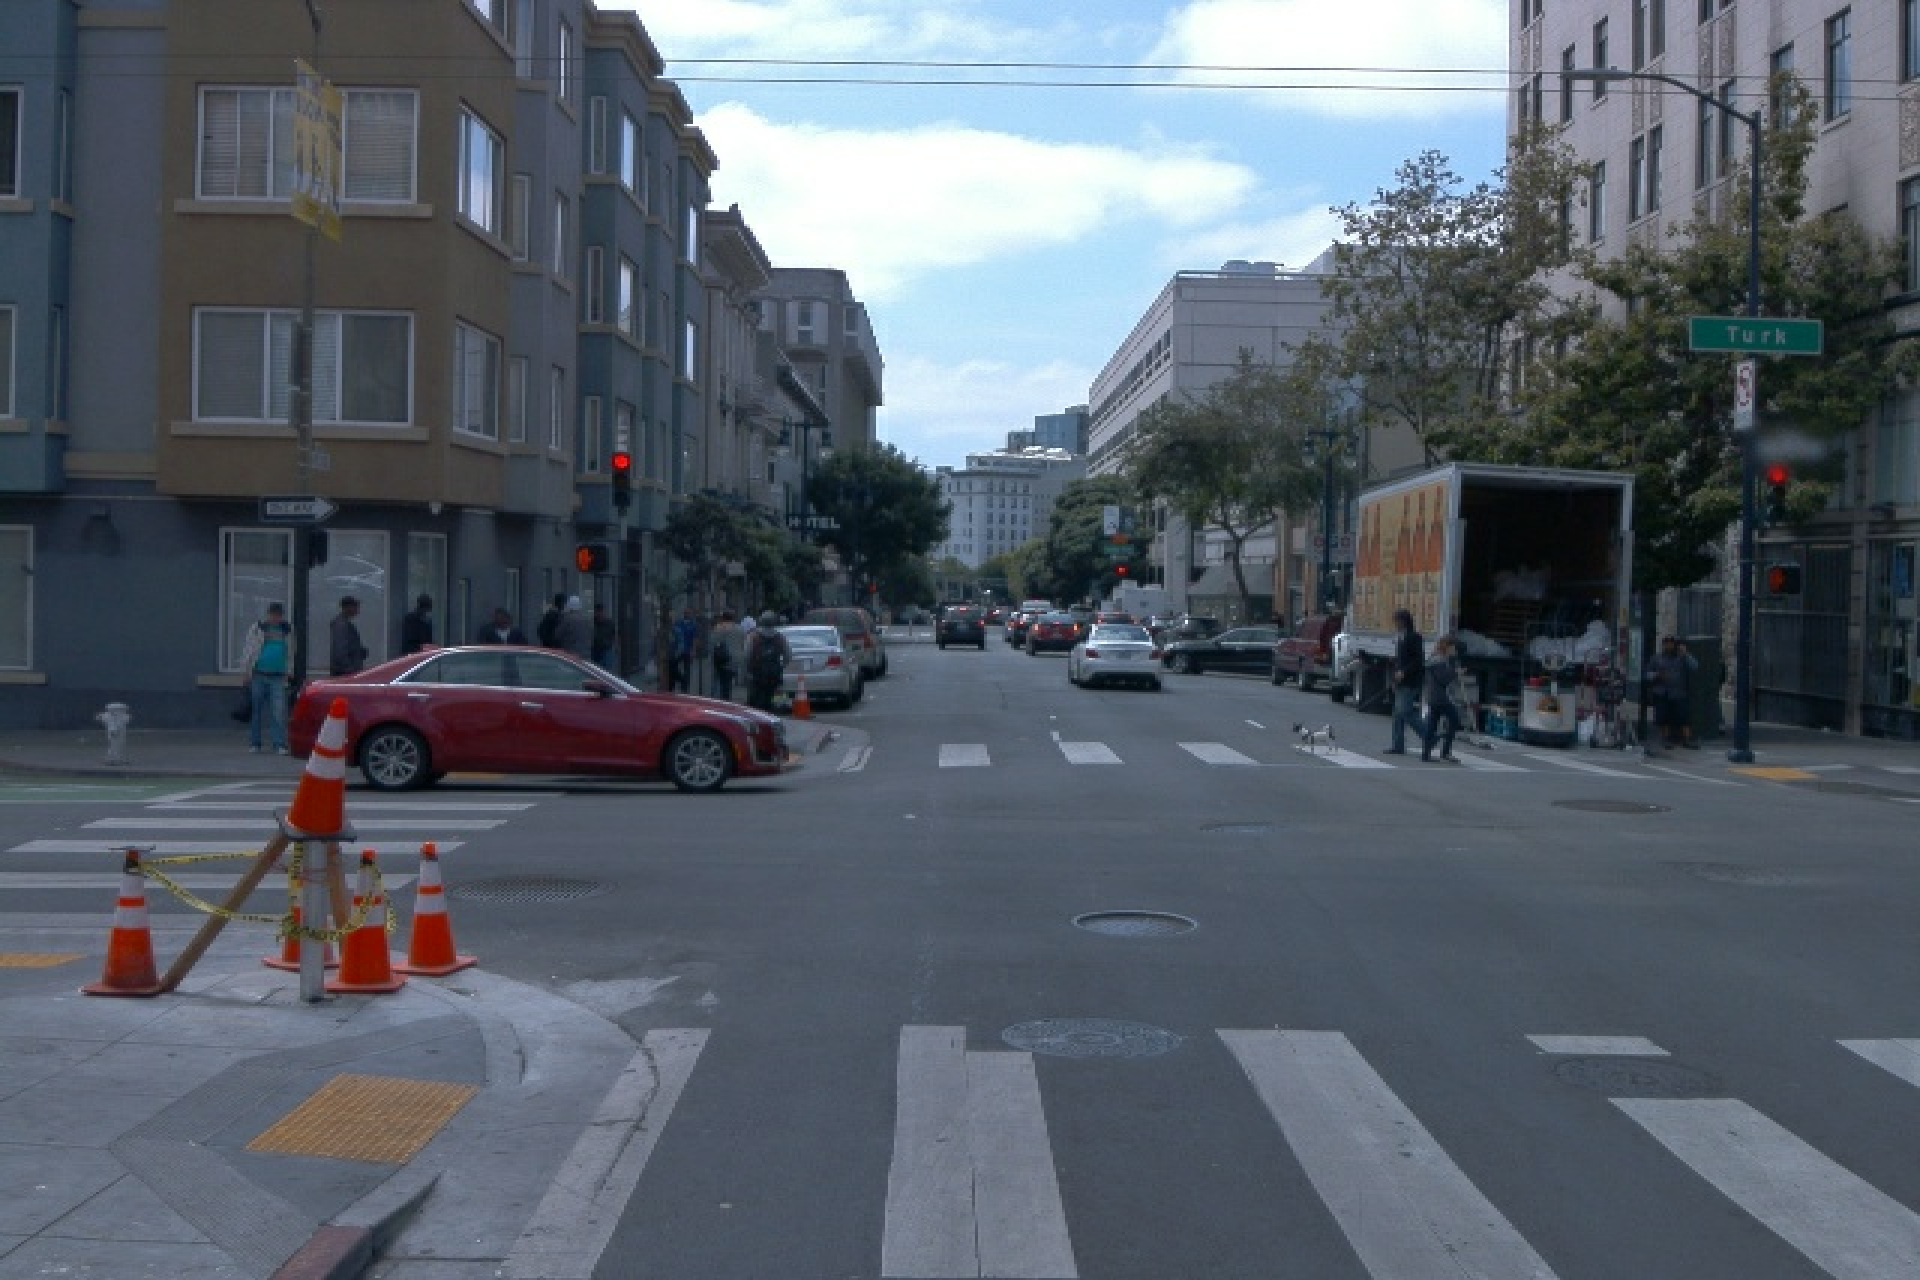

In [23]:
img_rgb

Let's try to mask everything but the red car. We can use the convert hsv image to threshold because it will be easier to isolate colors.

In [25]:
imarr = np.array(img_hsv)

In [26]:
imarr

array([[[148, 100,  84],
        [148, 100,  84],
        [148, 100,  84],
        ...,
        [155,  57, 152],
        [155,  57, 152],
        [155,  57, 152]],

       [[148, 100,  84],
        [148, 100,  84],
        [148, 100,  84],
        ...,
        [155,  57, 152],
        [155,  57, 152],
        [155,  57, 152]],

       [[148,  95,  88],
        [148,  95,  88],
        [148,  95,  88],
        ...,
        [155,  57, 152],
        [155,  57, 152],
        [155,  57, 152]],

       ...,

       [[148,  50, 121],
        [148,  50, 121],
        [148,  50, 121],
        ...,
        [150,  47, 140],
        [150,  47, 140],
        [150,  47, 140]],

       [[148,  48, 126],
        [148,  48, 126],
        [148,  48, 126],
        ...,
        [150,  47, 140],
        [150,  47, 140],
        [150,  47, 140]],

       [[148,  48, 126],
        [148,  48, 126],
        [148,  48, 126],
        ...,
        [150,  47, 140],
        [150,  47, 140],
        [150,  47, 140]]

Isolate the hue channel

In [35]:
hue = imarr[..., 0]
hue

array([[148, 148, 148, ..., 155, 155, 155],
       [148, 148, 148, ..., 155, 155, 155],
       [148, 148, 148, ..., 155, 155, 155],
       ...,
       [148, 148, 148, ..., 150, 150, 150],
       [148, 148, 148, ..., 150, 150, 150],
       [148, 148, 148, ..., 150, 150, 150]], dtype=uint8)

In [37]:
hue.shape

(1280, 1920)

In [38]:
hue = imarr[:, :, 0]
hue

array([[148, 148, 148, ..., 155, 155, 155],
       [148, 148, 148, ..., 155, 155, 155],
       [148, 148, 148, ..., 155, 155, 155],
       ...,
       [148, 148, 148, ..., 150, 150, 150],
       [148, 148, 148, ..., 150, 150, 150],
       [148, 148, 148, ..., 150, 150, 150]], dtype=uint8)

In [39]:
hue.shape

(1280, 1920)

Pillow converted HSV image have 3 channels containing 8 bits pixels. Because of that we need to convert the dark red hue (~340) in the same scale. 

In [40]:
340/360 * 255

240.83333333333331

In [74]:
red_hue = (hue > 230).astype(np.uint8)
# red_hue = (hue > 180).astype(np.uint8)
# red_hue = hue > 230

red_hue

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [75]:
np.max(red_hue)

1

We can use this to mask the rgb image

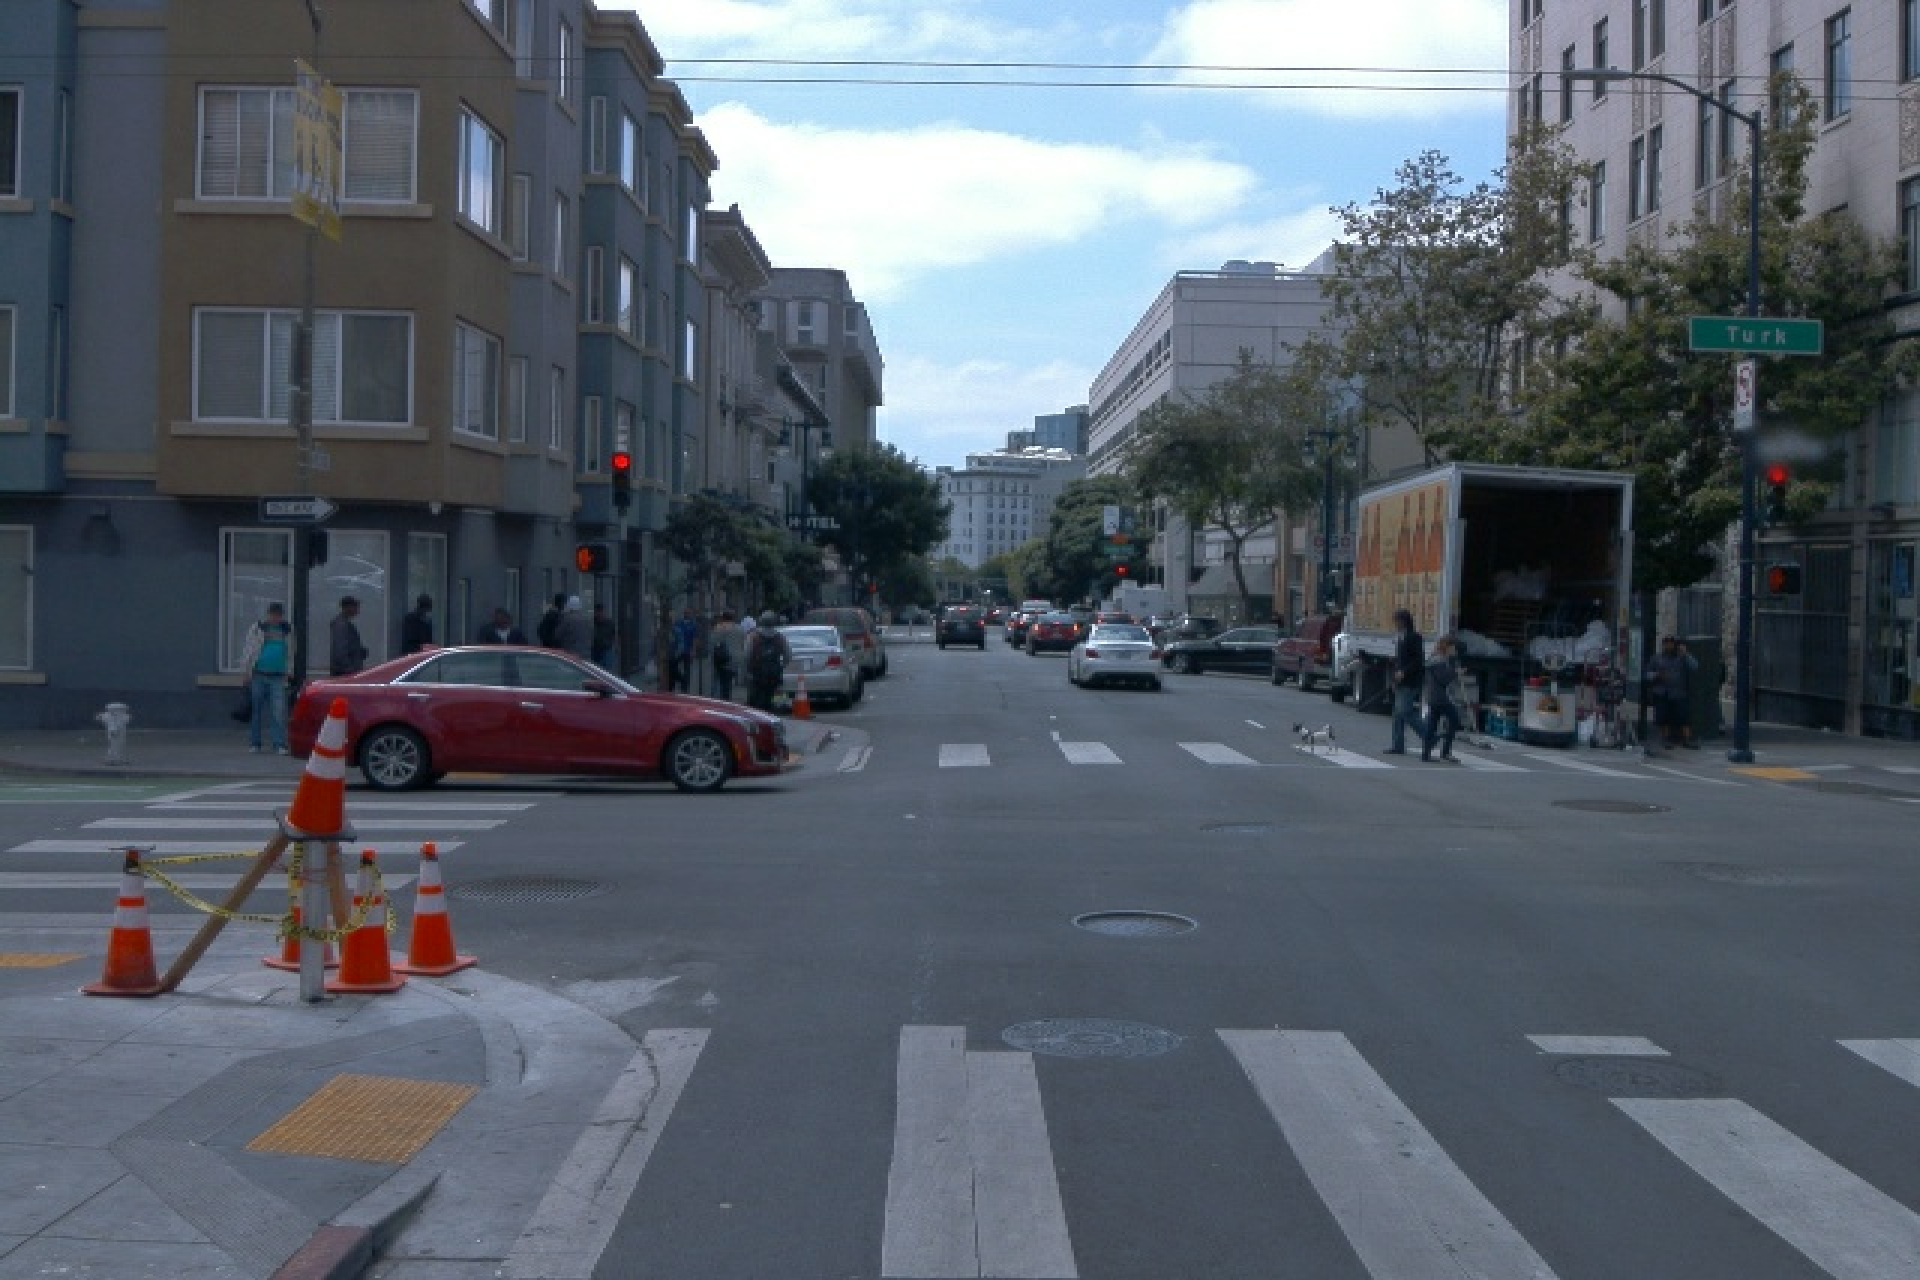

In [76]:
img_rgb

In [77]:
masked_rgb = np.array(img_rgb * np.stack([red_hue]*3, axis=2))
masked_rgb

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [78]:
np.mean(masked_rgb), np.max(masked_rgb)

(0.9687849934895834, 255)

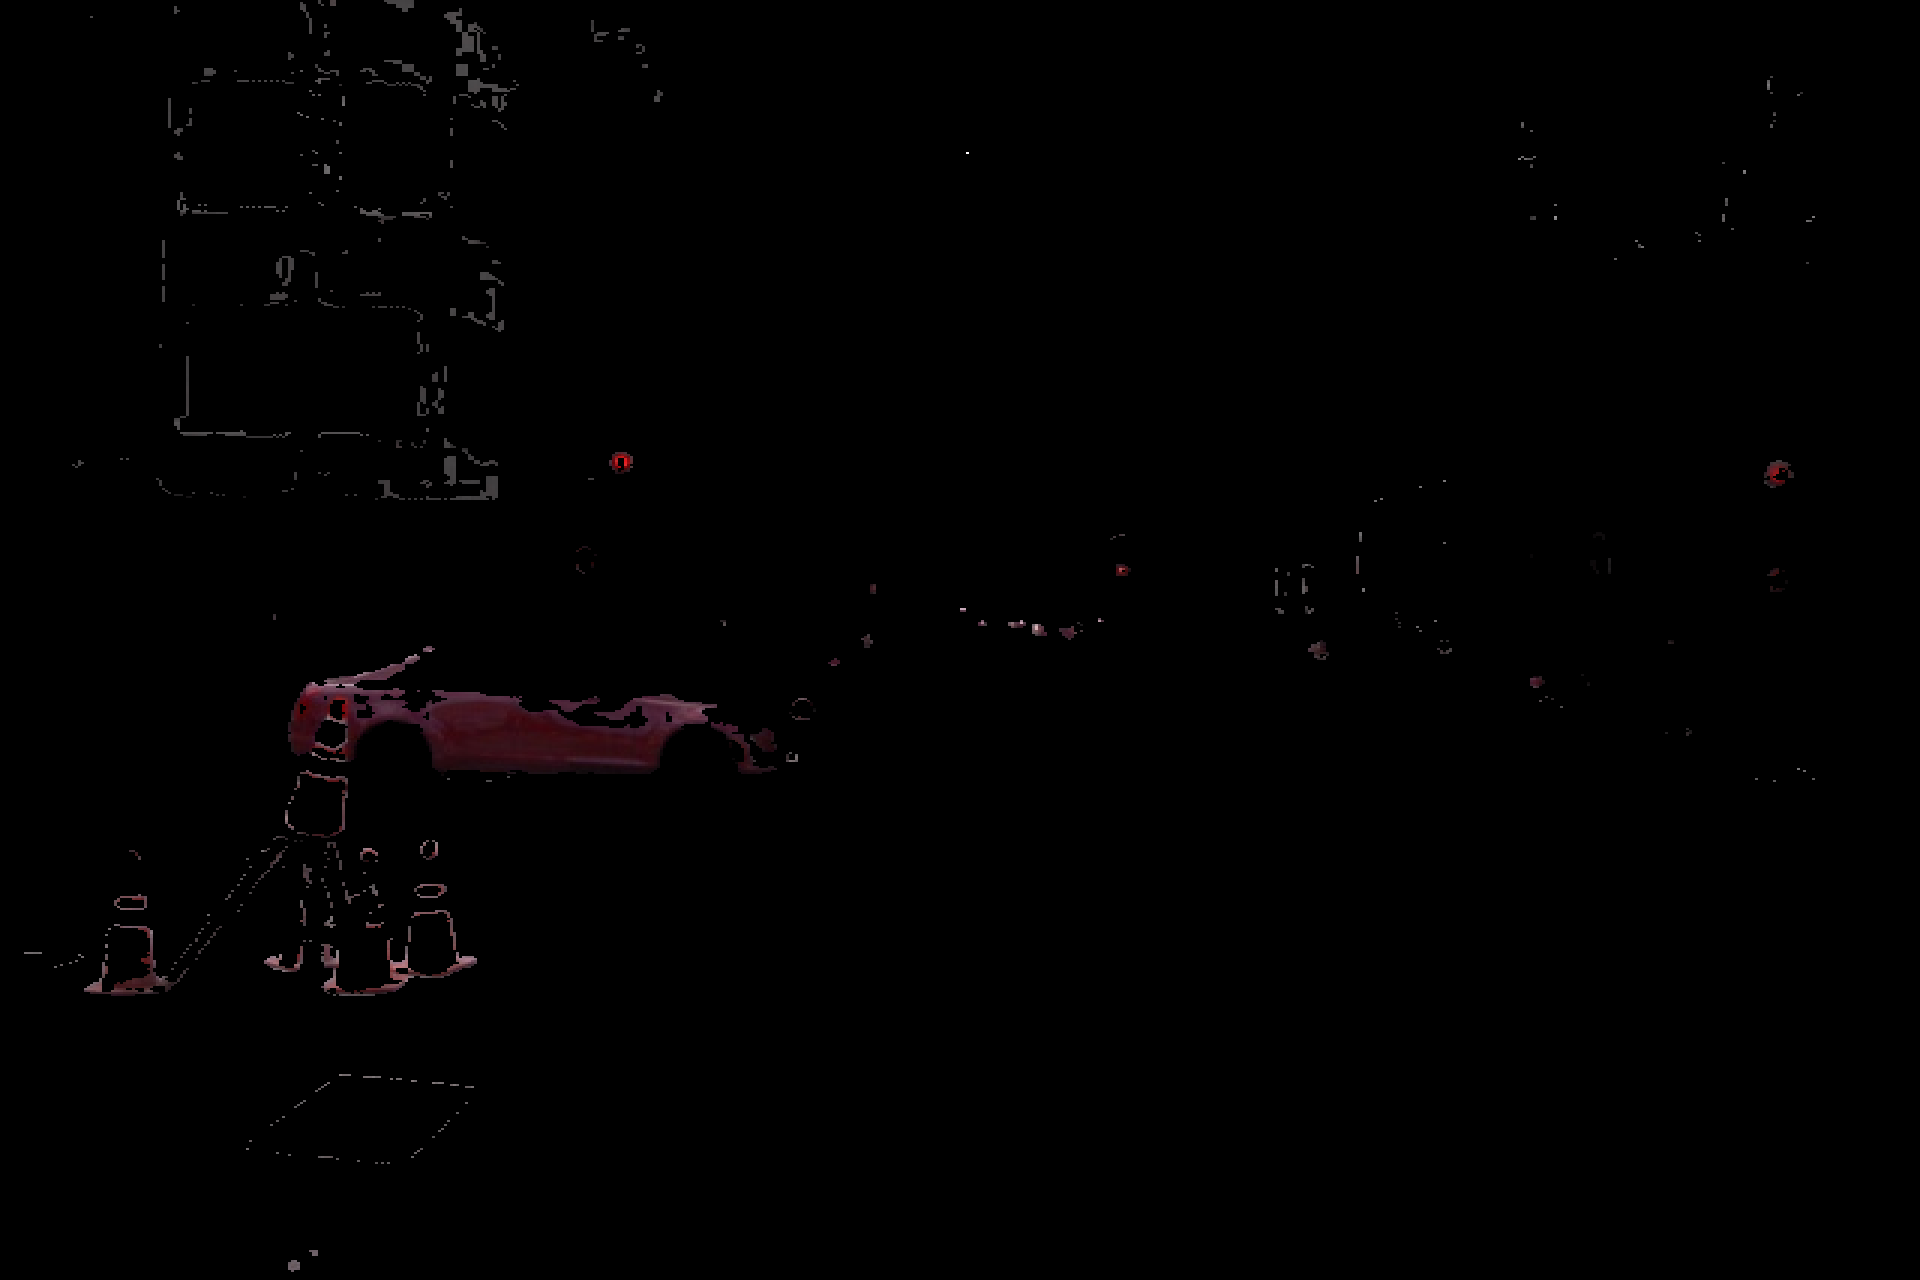

In [79]:
Image.fromarray(masked_rgb)

And we can convert this array back to a Pillow image

In [80]:
# we use this to emphasize the colors and make the object more visibles
masked_rgb *= 2
np.mean(masked_rgb), np.max(masked_rgb)

(1.8613199869791666, 254)

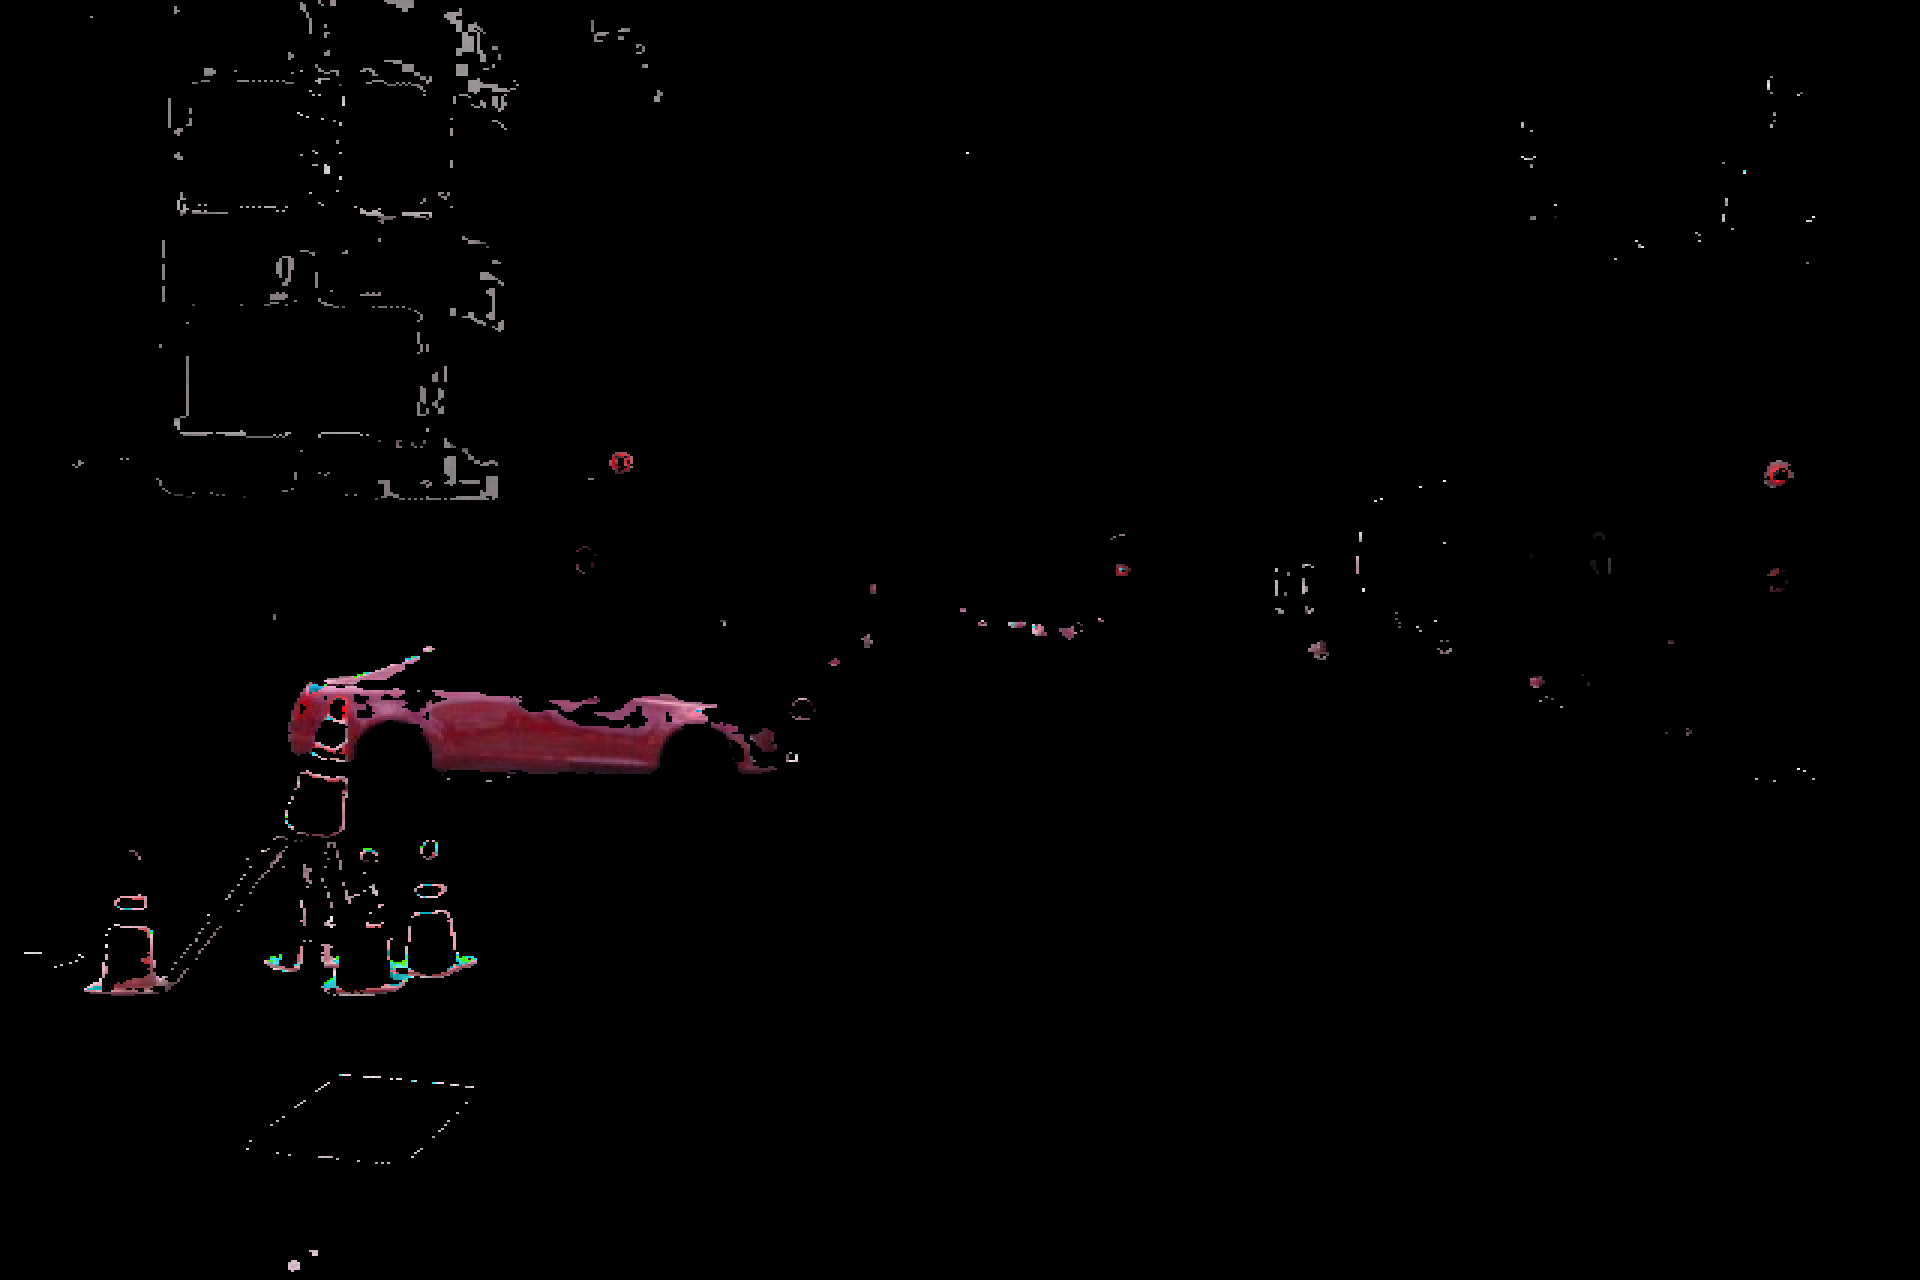

In [81]:
Image.fromarray(masked_rgb)